# Student Information
Name: 張宜婷 
ID: 106062585

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [2]:
def tokenize_text(text, remove_stopwords=False):
    """ Tokenize text using the nltk library """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

### 1. Data Preparation 

In [3]:
# three dataset 
dataset_list = ['yelp', 'imdb', 'amazon_cells']

In [4]:
# Directly load dataset into Pandas Dataframe
path_name = 'sentiment labelled sentences/'
df = {}
for name in dataset_list:
    txt_name = path_name + name + '_labelled.txt'
    df[name] = pd.read_csv(txt_name, delimiter='\t', names=['text', 'label'])    

data size

In [5]:
for name in dataset_list:
      print('len of dataset', name, ':', len(df[name]))

len of dataset yelp : 1000
len of dataset imdb : 748
len of dataset amazon_cells : 1000


dataset overview

In [6]:
for name in dataset_list:
    print('\ndataset', name)
    print(df[name][:5]) # show first 5 records


dataset yelp
                                                text  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

dataset imdb
                                                text  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

dataset amazon_cells
                                                text  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbon

In [7]:
for name in dataset_list:
    print('\ndataset', name, 'text')
    print(df[name][:5][['text']]) #show first 5 records of text column


dataset yelp text
                                                text
0                           Wow... Loved this place.
1                                 Crust is not good.
2          Not tasty and the texture was just nasty.
3  Stopped by during the late May bank holiday of...
4  The selection on the menu was great and so wer...

dataset imdb text
                                                text
0  A very, very, very slow-moving, aimless movie ...
1  Not sure who was more lost - the flat characte...
2  Attempting artiness with black & white and cle...
3       Very little music or anything to speak of.  
4  The best scene in the movie was when Gerardo i...

dataset amazon_cells text
                                                text
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.
2                             Great for the jawbone.
3  Tied to charger for conversations lasting more...
4                                 

In [8]:
for name in dataset_list:
    print('\ndataset', name, 'label')
    print(df[name][:5][['label']]) # show first 5 records of label column


dataset yelp label
   label
0      1
1      0
2      0
3      1
4      1

dataset imdb label
   label
0      0
1      0
2      0
3      0
4      1

dataset amazon_cells label
   label
0      0
1      1
2      1
3      0
4      1


last 10 records 

In [9]:
for name in dataset_list:
    print('\ndataset', name)
    print(df[name][-11:]) # show last 10 records


dataset yelp
                                                  text  label
989  I would avoid this place if you are staying in...      0
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

dataset imdb
                                                  text  label
737  :) Anyway, the plot flowed smoothly and the ma...      1
738  The opening sequence of this gem is a classic,...      1
739             Fans of the genre will be 

In [10]:
for name in dataset_list:
    print('\ndataset', name)
    print(df[name].iloc[::10, :][0:10]) # show first 10th records


dataset yelp
                                                 text  label
0                            Wow... Loved this place.      1
10                           Service was very prompt.      1
20                                The Burrittos Blah!      0
30  Also there are combos like a burger, fries, an...      1
40                       The shrimp tender and moist.      1
50  We ordered the duck rare and it was pink and t...      1
60  At least think to refill my water before I str...      0
70  The deal included 5 tastings and 2 drinks, and...      1
80  Coming here is like experiencing an underwhelm...      0
90  In summary, this was a largely disappointing d...      0

dataset imdb
                                                 text  label
0   A very, very, very slow-moving, aimless movie ...      0
10               And those baby owls were adorable.        1
20  This if the first movie I've given a 10 to in ...      1
30                      The problem was the script.      

###### Exercise 0: 
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [11]:
# Select column: df[col]
df['yelp']['text']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [12]:
# Select row by text 
df['yelp'].loc[df['yelp']['text'].isin(['Crust is not good.','Wow... Loved this place.'])]

,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [13]:
# Select row by integer location: df.iloc[loc]
df['yelp'].iloc[12]

text     The cashier had no care what so ever on what I...
label                                                    0
Name: 12, dtype: object

In [14]:
# Select rows by boolean vector: df[bool_vec]
df['yelp'][df['yelp'].label==1]

,text,label
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken,with cran...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


### 2. Missing values

missing value amount

In [15]:
for name in dataset_list:
    print(name, ':', sum(df[name].text.isnull()))

yelp : 0
imdb : 0
amazon_cells : 0


add missing values

In [16]:
dummy_series = pd.Series(["dummy_record"], index=["text"]) # create one row in dataframe type without 'label' info
result_with_series = df['yelp'].append(dummy_series, ignore_index=True) 

dummy_series = pd.Series([0], index=["label"]) # create one row in dataframe type without 'text' info
result_with_series = result_with_series.append(dummy_series, ignore_index=True)

result_with_series[-10:] 

,text,label
992,A lady at the table next to us found a live gr...,0.0
993,the presentation of the food was awful.,0.0
994,I can't tell you how disappointed I was.,0.0
995,I think food should have flavor and texture an...,0.0
996,Appetite instantly gone.,0.0
997,Overall I was not impressed and would not go b...,0.0
998,"The whole experience was underwhelming, and I ...",0.0
999,"Then, as if I hadn't wasted enough of my life ...",0.0
1000,dummy_record,NaN
1001,NaN,0.0


so, index 1000 and 1001 records I add have missinig values.

Check missing values again. Aparently, there are two missing value.

In [17]:
result_with_series.isnull().apply(lambda x: check_missing_values(x))

text     (The amoung of missing records is: , 1)
label    (The amoung of missing records is: , 1)
dtype: object

Deal with missing value.

In [18]:
result_with_series.dropna(inplace=True) # drop records which have missing values.
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: check_missing_values(x))

1000


text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

#### Exercise 1: 
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. 
Check the documentation for more information.

In [19]:
#use 'axis' parameter to get missing values for every records
df['yelp'].isnull().apply(lambda x: check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

###  3. Dealing with Duplicate Data
duplicated amount

In [20]:
for name in dataset_list:
    print(name, ':', sum(df[name].text.duplicated()))

yelp : 4
imdb : 3
amazon_cells : 10


show duplicated data

In [21]:
for name in dataset_list:
    print('\ndataset', name)
    dataset = df[name]
    print(dataset[dataset.text.duplicated()]) 


dataset yelp
                                  text  label
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0

dataset imdb
                                 text  label
165  Definitely worth checking out.        1
387                Not recommended.        0
590                           10/10        1

dataset amazon_cells
                                                  text  label
285                                      Great phone!.      1
407                                       Works great.      1
524                                      Works great!.      1
543                            Don't buy this product.      0
744  If you like a loud buzzing to override all you...      0
748                                      Does not fit.      0
778                              This is a great deal.      1
792                                       Gr

count times of every duplicated sentence.

In [22]:
for name in dataset_list:
    print('\ndataset:', name)
    dataset = df[name]
    duplicated_text = dataset[dataset.text.duplicated()]
    duplicated_text = list(duplicated_text['text']) # convert dataframe to list
    print(dataset.loc[dataset['text'].isin(duplicated_text)]) # show every duplicated records.
    print('(text, times)')
    for text in duplicated_text: 
        print(text, sum(dataset['text']==text))


dataset: yelp
                                  text  label
334                 I love this place.      1
380                   I won't be back.      0
383             The food was terrible.      0
505  I would not recommend this place.      0
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0
(text, times)
I love this place. 2
The food was terrible. 2
I won't be back. 2
I would not recommend this place. 2

dataset: imdb
                                 text  label
29   Definitely worth checking out.        1
64                            10/10        1
165  Definitely worth checking out.        1
374                Not recommended.        0
387                Not recommended.        0
590                           10/10        1
(text, times)
Definitely worth checking out.   2
Not recommended.   2
10/10   2

dataset: amazon_cells
                       

deal with duplicated records.

In [23]:
for name in dataset_list:
    print('\ndataset:', name)
    print('original data size:', len(df[name]))
    df[name].drop_duplicates(keep=False, inplace=True) # drop duplicates
    print('data size after drop duplicates:', len(df[name]))


dataset: yelp
original data size: 1000
data size after drop duplicates: 992

dataset: imdb
original data size: 748
data size after drop duplicates: 742

dataset: amazon_cells
original data size: 1000
data size after drop duplicates: 980


### 4.Data preprocessing

#### 4.1 sample data

In [24]:
# sample 500 records
df_sample = df['yelp'].sample(n=500)
len(df_sample)

500

In [25]:
df_sample[0:4]

,text,label
558,All of the tapas dishes were delicious!,1
624,Pretty awesome place.,1
931,If you want to wait for mediocre food and down...,0
284,I would definitely recommend the wings as well...,1


In [26]:
# plot 
data = [go.Histogram(x = np.array(df_sample.label), xbins = dict(size = 1))]
layout = go.Layout(title = 'label distribution of sample data',
                   xaxis = dict(title = 'Label'),
                   yaxis = dict(title = 'Count', range=[220, 280]),
                   bargap = 0.5)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = '')

##### Exercise 2: 
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. 
Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts. 

In [27]:
trace1 = go.Histogram(x = np.array(df[dataset_list[0]].label),
                      histnorm = 'count',
                      name = 'yelp',
                      marker = dict(color = '#39cc6e'),
                      opacity = 0.75)
trace2 = go.Histogram(x = np.array(df[dataset_list[1]].label),
                      name = 'imdb',
                      marker = dict(color = '#69db9e'),
                      opacity = 0.75)
trace3 = go.Histogram(x = np.array(df[dataset_list[2]].label),
                      name = 'amazon',
                      marker = dict(color = '#8ef2cf'),
                      opacity = 0.75)
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'labels distribution',
                   xaxis = dict(title = 'Value'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.3,
                   bargroupgap = 0.5)
fig = go.Figure(data = data, layout=layout)
py.iplot(fig, filename = 'styled histogram')

I also plot with matplotlib for the same target.

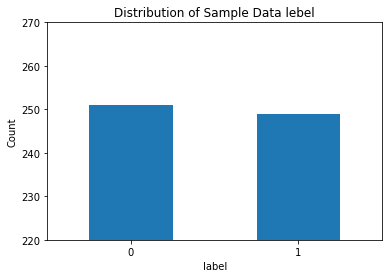

In [28]:
df_sample.label.value_counts().plot(kind="bar", rot=0)
plt.xlabel('label')
plt.ylabel('Count')
plt.ylim([220, 270])
plt.title('Distribution of Sample Data lebel')
plt.show()

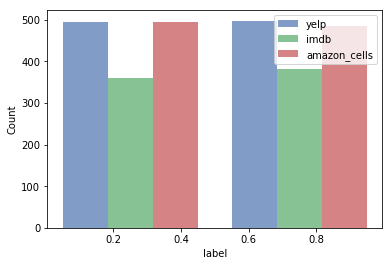

In [29]:
plt.style.use('seaborn-deep')
data =[np.array(df[dataset_list[i]].label) for i, _ in enumerate(dataset_list)]
plt.hist(data, bins=2, alpha=0.7, label=[name for name in dataset_list])
plt.legend(loc='upper right')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

#### 4.2 Feature Creation

tokenize by nltk

In [30]:
# tokenize text by space
for name in dataset_list:
    print('\ndataset:', name)
    df[name]['unigrams'] = df[name]['text'].apply(lambda x: tokenize_text(x))
    print(df[name][0:10][["unigrams"]]) 


dataset: yelp
                                            unigrams
0                  [Wow, ..., Loved, this, place, .]
1                          [Crust, is, not, good, .]
2  [Not, tasty, and, the, texture, was, just, nas...
3  [Stopped, by, during, the, late, May, bank, ho...
4  [The, selection, on, the, menu, was, great, an...
5  [Now, I, am, getting, angry, and, I, want, my,...
6  [Honeslty, it, did, n't, taste, THAT, fresh, ....
7  [The, potatoes, were, like, rubber, and, you, ...
8                  [The, fries, were, great, too, .]
9                               [A, great, touch, .]

dataset: imdb
                                            unigrams
0  [A, very, ,, very, ,, very, slow-moving, ,, ai...
1  [Not, sure, who, was, more, lost, -, the, flat...
2  [Attempting, artiness, with, black, &, white, ...
3  [Very, little, music, or, anything, to, speak,...
4  [The, best, scene, in, the, movie, was, when, ...
5  [The, rest, of, the, movie, lacks, art, ,, cha...
6               

by sci-kit learn libary

In [31]:
count_vect = {}
df_counts = {}
for name in dataset_list:
    count_vect[name] = CountVectorizer()
    df_counts[name] = count_vect[name].fit_transform(df[name].text) #tokenize and count for a corpus
    print('Shape of ', name, df_counts[name].shape)

Shape of  yelp (992, 2035)
Shape of  imdb (742, 3047)
Shape of  amazon_cells (980, 1845)


In [32]:
for name in dataset_list:
    analyze = count_vect[name].build_analyzer() 
    print(name, analyze(" ".join(list(df[name][14:15].text)))) # tokenize some sentence 

yelp ['was', 'disgusted', 'because', 'was', 'pretty', 'sure', 'that', 'was', 'human', 'hair']
imdb ['this', 'is', 'very', 'right', 'on', 'case', 'movie', 'that', 'delivers', 'everything', 'almost', 'right', 'in', 'your', 'face']
amazon_cells ['the', 'design', 'is', 'very', 'odd', 'as', 'the', 'ear', 'clip', 'is', 'not', 'very', 'comfortable', 'at', 'all']


In [33]:
for name in dataset_list:
    print('the feature names of the vectorizer\n', count_vect[name].get_feature_names()[30:40])

the feature names of the vectorizer
 ['accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable']
the feature names of the vectorizer
 ['80s', '8pm', '90', '95', 'aailiyah', 'abandoned', 'ability', 'about', 'above', 'abroad']
the feature names of the vectorizer
 ['8530', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'absolutel', 'absolutely', 'ac']


In [34]:
df[dataset_list[0]][:10]

,text,label,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,..."
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ...."
7,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ..."
8,The fries were great too.,1,"[The, fries, were, great, too, .]"
9,A great touch.,1,"[A, great, touch, .]"


In [35]:
# feaure table of corpus 'yelp'
df_counts[dataset_list[0]][15:17,100:300].toarray() 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [36]:
count_vect[dataset_list[0]].transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [37]:
count_vect[dataset_list[1]].transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [38]:
# plot sparse matrix
dataset_name = 'yelp'
doc_N = 20
term_N = 20
plot_x = ["term_"+str(i) for i in count_vect[dataset_name].get_feature_names()[:term_N]]
plot_y = ["doc_"+ str(i) for i in list(df[dataset_name].index)[:doc_N]]
plot_z = df_counts[dataset_name][:doc_N, :term_N].toarray()
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

#### Exercise 3: 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [39]:
dataset_name = 'yelp'
doc_N = 200
term_N = 200
plot_x = ["term_"+str(i) for i in count_vect[dataset_name].get_feature_names()[:term_N]]
plot_y = ["doc_"+ str(i) for i in list(df[dataset_name].index)[:doc_N]]
plot_z = df_counts[dataset_name][:doc_N, :term_N].toarray()
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

use matplotlib libary

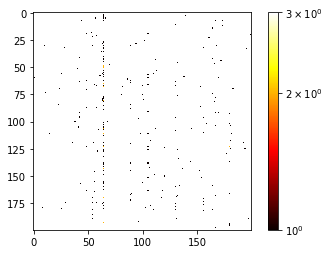

In [40]:
from matplotlib.colors import LogNorm
plt.imshow(plot_z, cmap='hot', norm=LogNorm(), interpolation='nearest')
plt.colorbar()
plt.show()

#### 4.3 Dimensionality Reduction 

In [41]:
from sklearn.decomposition import PCA
# reduce demension
df_reduced = PCA(n_components=3).fit_transform(df_counts['yelp'].toarray())  
df_reduced.shape

(992, 3)

In [42]:
# plot after demension reduction to three demension
trace1 = ta.get_trace(df_reduced, df['yelp']['label'], 1, "rgb(71,233,163)")
trace2 = ta.get_trace(df_reduced, df['yelp']['label'], 0, "rgb(52,133,252)")
data = [trace1, trace2]
layout = go.Layout(margin = dict(l = 0,
                                 r = 0,
                                 b = 0,
                                 t = 0))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

#### 4.4 Atrribute Transformation / Aggregation

In [43]:
term_frequencies = []
for j in range(0, df_counts['yelp'].shape[1]):
    term_frequencies.append(sum(df_counts['yelp'][:,j].toarray()))
py.iplot(ta.plot_word_frequency([count_vect['yelp'].get_feature_names(), term_frequencies], "Term Frequency Distribution"))

#### Exercise 4: 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise.

In [44]:
# only show the terms which frequency more than 30 
filter_freq = 30
t_f = np.array(term_frequencies)[np.array(term_frequencies) > filter_freq]
f_n = []
for i in range(len(term_frequencies)):
    if [np.array(term_frequencies) > filter_freq][0][i]:
        f_n.append(list(count_vect['yelp'].get_feature_names())[i])
py.iplot(ta.plot_word_frequency([f_n, t_f], "Term Frequency Distribution"))

####  Exercise 5: 
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [45]:
f_n_sorted = [x for _, x in sorted(zip(t_f, f_n), reverse=True)]
t_f_sorted = sorted(t_f, reverse=True)
py.iplot(ta.plot_word_frequency([f_n_sorted, t_f_sorted], "Term Frequency Distribution"))

In [46]:
# take one log on term frequency
term_frequencies_log = [math.log(i) for i in term_frequencies]
py.iplot(ta.plot_word_frequency([count_vect['yelp'].get_feature_names(), term_frequencies_log], "Term Frequency(log) Distribution"))

In [47]:
# sort one log 

In [48]:
f_n_log_sorted = [x for _, x in sorted(zip(term_frequencies_log, list(count_vect['yelp'].get_feature_names())), reverse=True)]
t_f_log_sorted = sorted(term_frequencies_log, reverse=True)
py.iplot(ta.plot_word_frequency([f_n_log_sorted, t_f_log_sorted], "Term Frequency(log) Distribution"))

#### 4.5 Discretization and Binarization

In [49]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
dataset_name = 'yelp'
mlb = preprocessing.LabelBinarizer()
mlb.fit(df[dataset_name].label)
df[dataset_name]['bin_label'] = mlb.transform(df[dataset_name]['label']).tolist()
df[dataset_name][0:9]

,text,label,unigrams,bin_label
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,"[The, fries, were, great, too, .]",[1]


## 5. MORE...

#### Is there any useful information in length of text?

In [50]:
# merge dataset
for name in dataset_list:
    df[name]['dataset_name'] = name
df_all = pd.concat([df['yelp'], df['imdb'], df['amazon_cells']])
df_all.index = range(df_all.shape[0])
df_all.sample(n=20)

,bin_label,dataset_name,label,text,unigrams
1831,NaN,amazon_cells,1,Best I've found so far .... I've tried 2 other...,"[Best, I, 've, found, so, far, ..., ., I, 've,..."
525,[1],yelp,1,The bartender was also nice.,"[The, bartender, was, also, nice, .]"
2140,NaN,amazon_cells,1,An Awesome New Look For Fall 2000!.,"[An, Awesome, New, Look, For, Fall, 2000, !, .]"
1483,NaN,imdb,1,You wont regret it!,"[You, wont, regret, it, !]"
223,[0],yelp,0,Hopefully this bodes for them going out of bus...,"[Hopefully, this, bodes, for, them, going, out..."
1513,NaN,imdb,0,"Seriously, it's not worth wasting your, or you...","[Seriously, ,, it, 's, not, worth, wasting, yo..."
578,[0],yelp,0,"If you look for authentic Thai food, go else w...","[If, you, look, for, authentic, Thai, food, ,,..."
1896,NaN,amazon_cells,1,Works like a charm; it work the same as the on...,"[Works, like, a, charm, ;, it, work, the, same..."
85,[1],yelp,1,I love the Pho and the spring rolls oh so yumm...,"[I, love, the, Pho, and, the, spring, rolls, o..."
2148,NaN,amazon_cells,0,Also the area where my unit broke).- I'm not t...,"[Also, the, area, where, my, unit, broke, ), ...."


After I merge three dataset, I create a new column named 'dataset_name'. Then, I want to know the correlation between column 'dataset_name' and 'label'.

In [51]:
count_vect = CountVectorizer()
count_vect.fit(df_all.text)
df_counts = count_vect.transform(df_all.text) #tokenize and count for a corpus
print('Shape of ',  df_counts.shape)

Shape of  (2714, 5153)


As mention early, I know shape of yelp(992, 2035), imdb(742, 3047) and amazon_cells(980, 1845). After merging dataset, shape is (2714, 5153). Showing that there are these many the same word of three dataset.(5153 < 2035+3047+1845)  

In [55]:
analyze = count_vect.build_analyzer()

# yelp_p : 'yelp' dataset with positive comment
# p : total data with positive comment
key_list = ['yelp', 'imdb', 'amazon_cells', 
            'p', 'n', 
            'yelp_p', 'yelp_n', 'imdb_p', 'imdb_n', 'amazon_cells_p', 'amazon_cells_n']

temp = {} # ditionary{key: list of length of text}
for k in key_list:
    temp[k] = []
for i in range(df_all.shape[0]):
    name = df_all.dataset_name[i]
    text_len = len(analyze(" ".join(list(df_all['text'][i:i+1]))))
    temp[name].append(text_len) 
    if df_all.label[i]: # label == 1 (positive comment)
        temp['p'].append(text_len)
        temp[name + '_p'].append(text_len)
        
    else: # label == 0 (negative comment)
        temp['n'].append(text_len)
        temp[name + '_n'].append(text_len)

I use boxplot to show distribution of each condition.

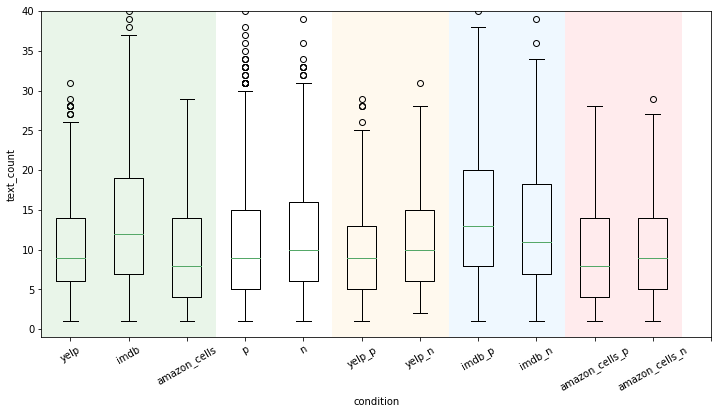

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.boxplot([temp[key] for key in key_list])
plt.ylim([-1, 40])
plt.xticks(range(1, 13), key_list, rotation=30)
# plot background color
plt.axvspan(0, 3.5, facecolor='#2ca02c', alpha=0.1)
plt.axvspan(5.5, 7.5, facecolor='#ffc85b', alpha=0.1)
plt.axvspan(7.5, 9.5, facecolor='#63bbff', alpha=0.1)
plt.axvspan(9.5, 11.5, facecolor='#ff3d57', alpha=0.1)
plt.ylabel('text_count')
plt.xlabel('condition')
plt.show()

In green background, there are more word of comment in 'imdb' than the other. Then in blue background, positive comment are more word the the negative comment in 'imdb'. The other color of background, the length of text is statistically nonsignificant. 